Importing the Dependencies

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The Keras functional API is a way to create models that are more flexible than the keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

In [2]:
input = keras.Input(shape = (784,))

In [3]:
img_inputs = keras.Input(shape = (32,32,3))

In [4]:
print(input.shape)
print(input.dtype)

(None, 784)
<dtype: 'float32'>


We create a new node in the graph of layers by calling a layer on this inputs object:

In [5]:
dense = layers.Dense(64, activation = 'relu')
x = dense(input)

The "layer call" action is like drawing an arrow from "inputs" to this layer we created. You're "passing" the inputs to the dense layer, and we get x as the output.

In [6]:
x = layers.Dense(64, activation = 'relu') (x)
outputs = layers.Dense(10)(x)

In [7]:
model = keras.Model(inputs = input, outputs = outputs, name = "mnist_model")

In [8]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Plotting model as a graph

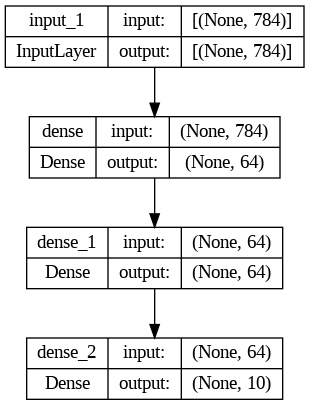

In [10]:
keras.utils.plot_model(model, "f_api_model.png", show_shapes = True)

Training, evaluation, and inference work exactly in the same way for models built using the functional API as for Sequential models.

Here I loaded the MNIST data then then reshaped into the vector and then training and validation.

In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [36]:

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255


In [37]:

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


In [40]:

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9763 - val_loss: 0.1276 - val_sparse_categorical_accuracy: 0.9653
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0672 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.1185 - val_sparse_categorical_accuracy: 0.9680
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0568 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.1079 - val_sparse_categorical_accuracy: 0.9719
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9721
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.1063 - val_sparse_categorical_accuracy: 0.9719


In [41]:

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0918 - sparse_categorical_accuracy: 0.9741 - 690ms/epoch - 2ms/step
Test loss: 0.09179840981960297
Test accuracy: 0.9740999937057495
